In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("salary_data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X = imp.fit_transform(X)
y = y.reshape(-1, 1)
y = imp.fit_transform(y)
y = y.reshape(-1)

In [5]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 1)
(30,)
(21, 1)
(9, 1)
(21,)
(9,)


In [8]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred=model.predict(X_test)

In [10]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [13]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
res=r2_score(y_test,y_pred)
res

0.9740993407213511

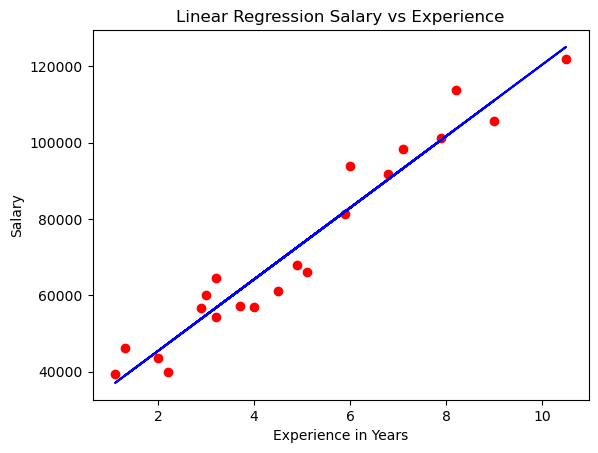

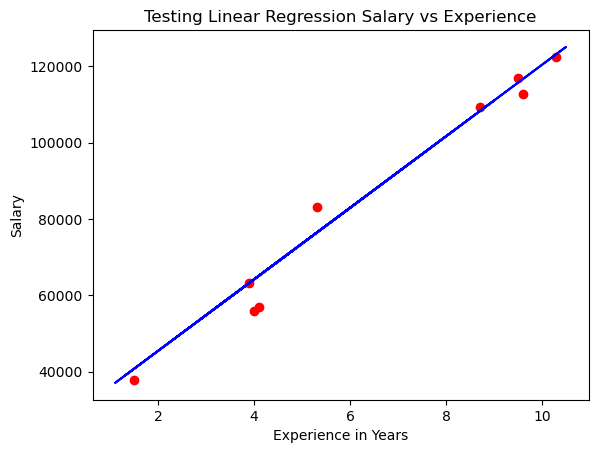

In [14]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, model.predict(X_train), color="blue")
plt.title("Linear Regression Salary vs Experience")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()
# Visualize the Testing Data
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, model.predict(X_train), color="blue")
plt.title("Testing Linear Regression Salary vs Experience")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()